# Banking Analaysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("DS1_C6_S4_Credit_Data_Hackathon.csv")
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,-232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,-182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,-4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,-340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           100000 non-null  int64  
 1   TARGET               100000 non-null  int64  
 2   NAME_CONTRACT_TYPE   100000 non-null  object 
 3   GENDER               100000 non-null  object 
 4   Car                  100000 non-null  object 
 5   House                100000 non-null  object 
 6   CNT_CHILDREN         100000 non-null  int64  
 7   AMT_INCOME_TOTAL     100000 non-null  float64
 8   AMT_CREDIT           100000 non-null  float64
 9   AMT_GOODS_PRICE      99919 non-null   float64
 10  NAME_TYPE_SUITE      99595 non-null   object 
 11  NAME_INCOME_TYPE     100000 non-null  object 
 12  NAME_EDUCATION_TYPE  100000 non-null  object 
 13  NAME_FAMILY_STATUS   100000 non-null  object 
 14  DAYS_EMPLOYED        100000 non-null  int64  
 15  MOBILE            

In [4]:
df.isnull().sum()

SK_ID_CURR                 0
TARGET                     0
NAME_CONTRACT_TYPE         0
GENDER                     0
Car                        0
House                      0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_GOODS_PRICE           81
NAME_TYPE_SUITE          405
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
DAYS_EMPLOYED              0
MOBILE                     0
WORK_PHONE                 0
HOME_PHONE                 0
MOBILE_REACHABLE           0
FLAG_EMAIL                 0
OCCUPATION_TYPE        31224
CNT_FAM_MEMBERS            1
APPLICATION_DAY            0
TOTAL_DOC_SUBMITTED        0
dtype: int64

# We have to deal with the null values

In [5]:
df["AMT_GOODS_PRICE"].fillna(df["AMT_GOODS_PRICE"].mode()[0],inplace=True)

In [6]:
df["AMT_GOODS_PRICE"].isnull().sum()

0

In [7]:
df["NAME_TYPE_SUITE"].fillna(df["NAME_TYPE_SUITE"].mode()[0],inplace=True)

In [8]:
df["NAME_TYPE_SUITE"].isnull().sum()

0

In [9]:
df["OCCUPATION_TYPE"].fillna(df["OCCUPATION_TYPE"].mode()[0],inplace=True)

In [10]:
df["OCCUPATION_TYPE"].isnull().sum()

0

In [11]:
df["CNT_FAM_MEMBERS"].fillna(df["CNT_FAM_MEMBERS"].mode()[0],inplace=True)

In [12]:
df["CNT_FAM_MEMBERS"].isnull().sum()

0

# Seperate the Object and Numberical

In [13]:
cat_df=df.select_dtypes(include="object")
num_df=df.select_dtypes(exclude="object")

In [14]:
cat_df.columns

Index(['NAME_CONTRACT_TYPE', 'GENDER', 'Car', 'House', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'OCCUPATION_TYPE', 'APPLICATION_DAY'],
      dtype='object')

In [15]:
num_df.columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED', 'MOBILE',
       'WORK_PHONE', 'HOME_PHONE', 'MOBILE_REACHABLE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'TOTAL_DOC_SUBMITTED'],
      dtype='object')

In [16]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1


In [17]:
df.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,-232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,-182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,-4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,-340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2
99999,216090,0,Revolving loans,M,Y,Y,0,202500.0,337500.0,337500.0,...,-3230,1,1,1,1,0,Drivers,2.0,SATURDAY,0


In [18]:
def info_cat(col):
    print(f"The Unique values for the column {col}are {df[col].unique()}")
    print(f" Most Frequent value for the column {col} is {df[col].mode()[0]}")
    print(f"Total missing value present in the column{col}is {df[col].isnull().sum()}")

In [19]:
info_cat("NAME_INCOME_TYPE")

The Unique values for the column NAME_INCOME_TYPEare ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
 Most Frequent value for the column NAME_INCOME_TYPE is Working
Total missing value present in the columnNAME_INCOME_TYPEis 0


In [20]:
def info_num(num):
    print(f"The mean value of the column {num} is {df[num].mean()}")
    print(f"The Median value of the column {num} is {df[num].median()}")
    print(f"The Standard Deviation value for the column {num}is {df[num].isnull().sum()}")

In [21]:
info_num("AMT_INCOME_TOTAL")

The mean value of the column AMT_INCOME_TOTAL is 169426.07027325002
The Median value of the column AMT_INCOME_TOTAL is 144000.0
The Standard Deviation value for the column AMT_INCOME_TOTALis 0


# Members Count in the Bank

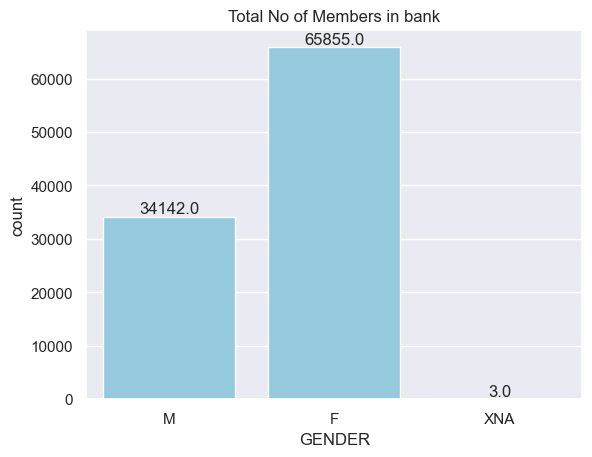

In [67]:
Ge= sns.countplot(x=df["GENDER"],color="skyblue")
plt.title("Total No of Members in bank")
for bar in Ge.patches:
  count = bar.get_height()
  x = bar.get_x()+bar.get_width()/2
  y = bar.get_height()
  Ge.annotate(count, (x, y), va = 'bottom', ha = 'center')
plt. savefig("Total No of Members in bank.png")

# Contract Type separed by Gender 

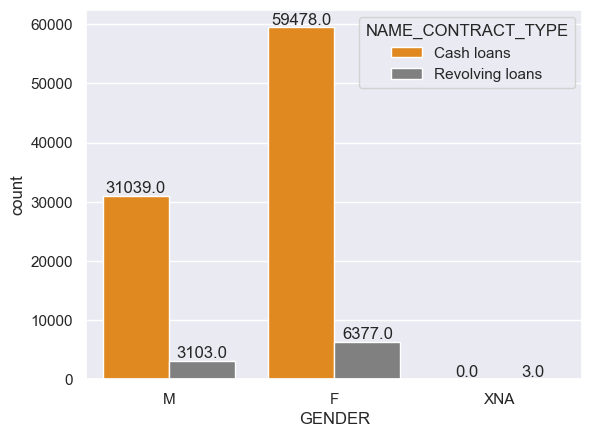

<Figure size 640x480 with 0 Axes>

In [70]:
an=sns.countplot(x = df['GENDER'], hue = df['NAME_CONTRACT_TYPE'],palette=["darkorange","grey"])
for bar in an.patches:
  count = bar.get_height()
  x = bar.get_x()+bar.get_width()/2
  y = bar.get_height()
  an.annotate(count, (x, y), va = 'bottom', ha = 'center')
plt.show()
plt. savefig("Contract Type.JPEG")

# Contract Type check the target along with the Gender

<Figure size 1500x800 with 0 Axes>

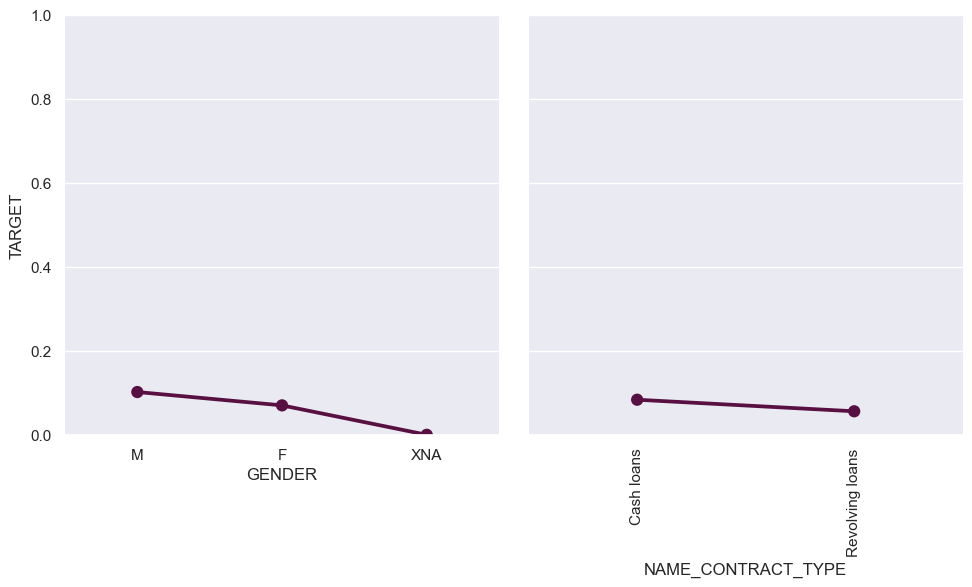

In [24]:
plt.figure(figsize=(15,8))
sns.set_theme(style="darkgrid")
g = sns.PairGrid(data=df, y_vars="TARGET",
                 x_vars=["GENDER", "NAME_CONTRACT_TYPE"],
                 height=5, aspect=1)
g.map(sns.pointplot, color="xkcd:plum")
g.set(ylim=(0, 1))
sns.despine(fig=g.fig, left=True)
plt.xticks(rotation=90)
plt.show()

# Gender wise measure the target

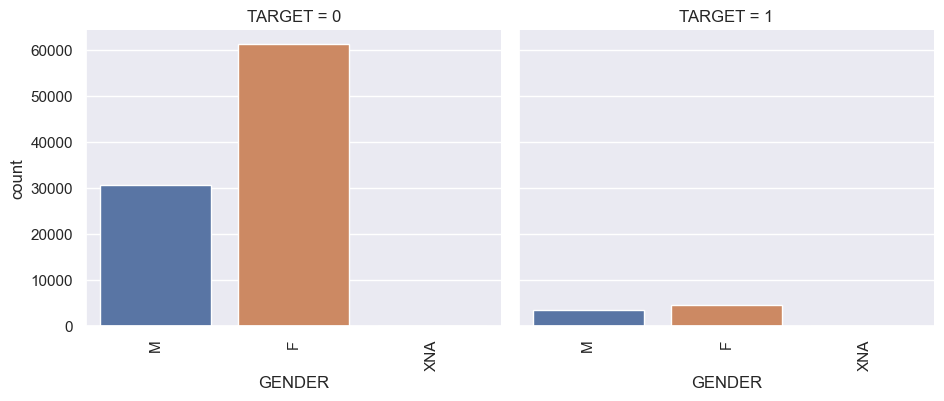

In [25]:
sns.set_theme(style="darkgrid")
plot=sns.catplot(data=df, x="GENDER", kind="count", col="TARGET", height=4, aspect=1.2,palette="deep")
for ax in plot.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

# Gender Wise ratio of Target

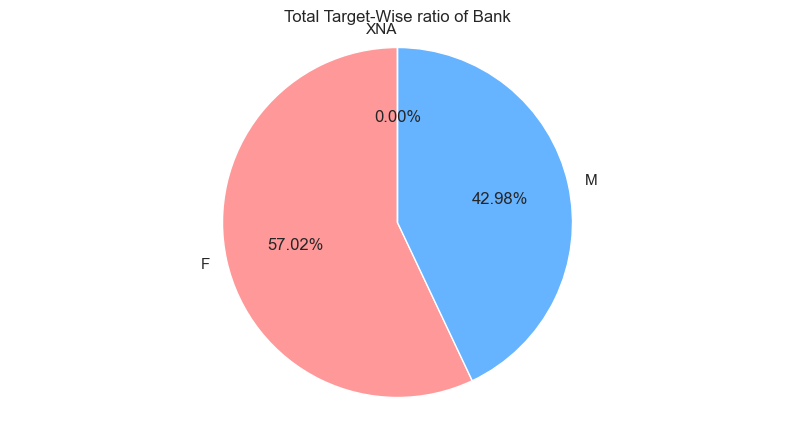

In [26]:
Target_cost=df.groupby("GENDER")["TARGET"].sum()
Total_Cost=Target_cost.sum()
Target_ratio=Target_cost/Total_Cost*100
plt.figure(figsize=(10,5))
plt.pie(Target_ratio,labels=Target_ratio.index,autopct="%0.2f%%",startangle=90,colors=['#ff9999','#66b3ff'])
plt.title("Total Target-Wise ratio of Bank")
plt.axis("equal")
plt.show()

# Gender wise check house along with the Target

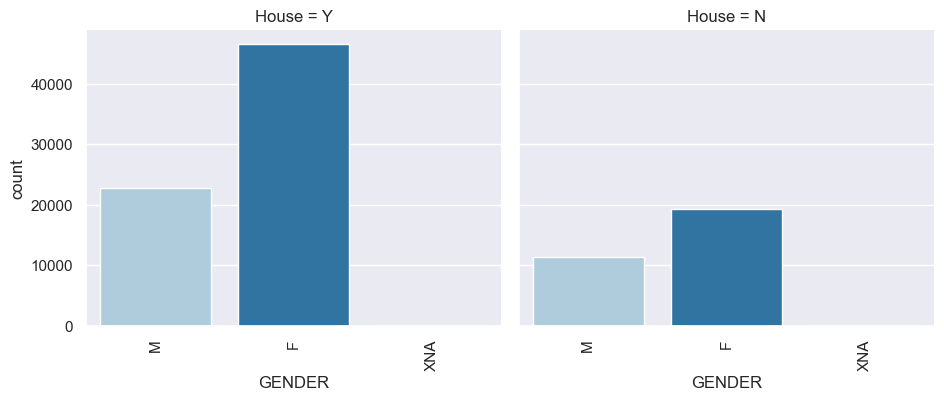

In [27]:
sns.set_theme(style="darkgrid")
plot=sns.catplot(data=df, x="GENDER", kind="count", col="House", height=4, aspect=1.2,palette="Paired")
for ax in plot.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

# Gender wise check car along with the Target

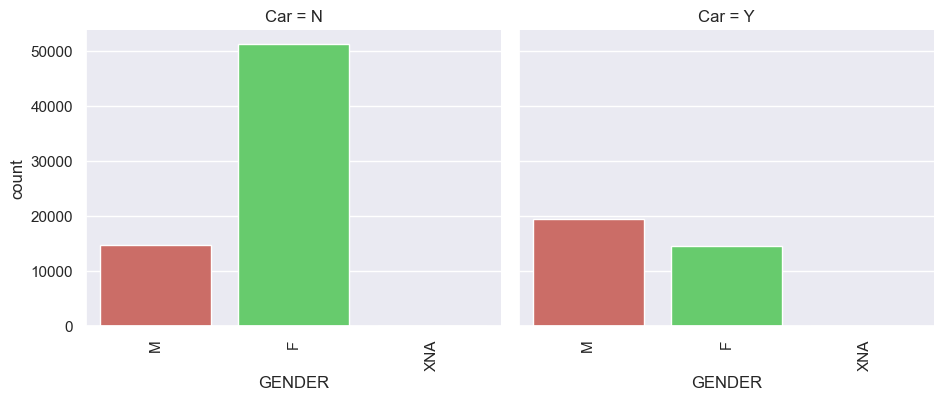

In [28]:
sns.set_theme(style="darkgrid")
plot=sns.catplot(data=df, x="GENDER", kind="count", col="Car", height=4, aspect=1.2,palette="hls")
for ax in plot.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

# Compare Target Wise each Gender,House,Car

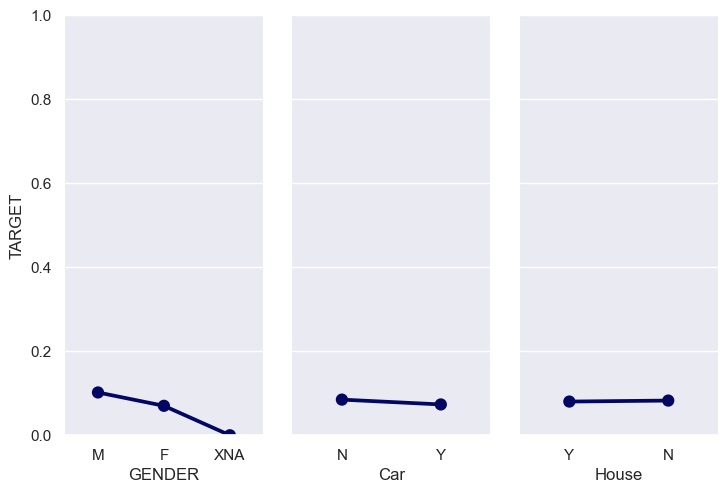

In [29]:
sns.set_theme(style="darkgrid")
g = sns.PairGrid(data=df, y_vars="TARGET",
                 x_vars=["GENDER", "Car", "House"],
                 height=5, aspect=.5)
g.map(sns.pointplot, color="xkcd:Darkblue")
g.set(ylim=(0, 1))
sns.despine(fig=g.fig, left=True)

# Gender wise check Mobile-Phone Available or not

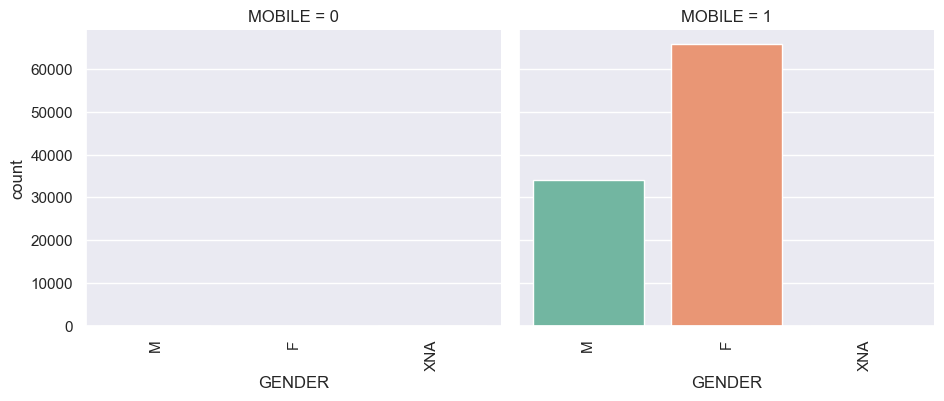

In [30]:
sns.set_theme(style="darkgrid")
plot=sns.catplot(data=df, x="GENDER", kind="count", col="MOBILE", height=4, aspect=1.2,palette="Set2")
for ax in plot.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

# Gender wise check Work-Phone Available or not

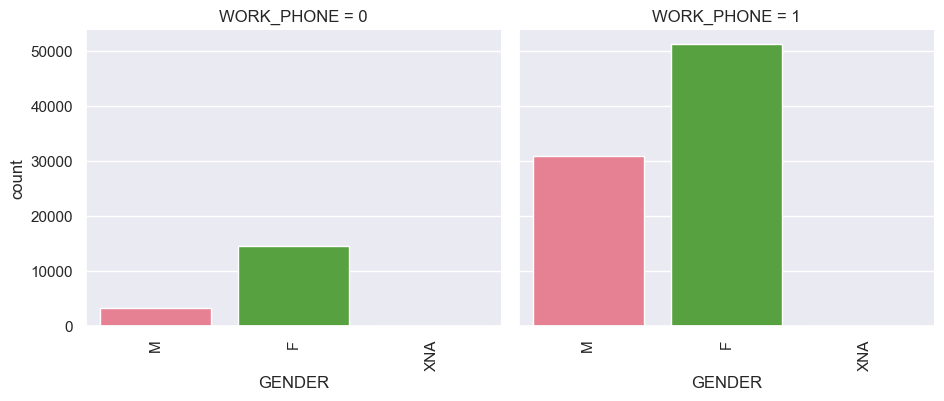

In [31]:
sns.set_theme(style="darkgrid")
plot=sns.catplot(data=df, x="GENDER", kind="count", col="WORK_PHONE", height=4, aspect=1.2,palette="husl")
for ax in plot.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

# Gender wise check Home-Phone Available or not

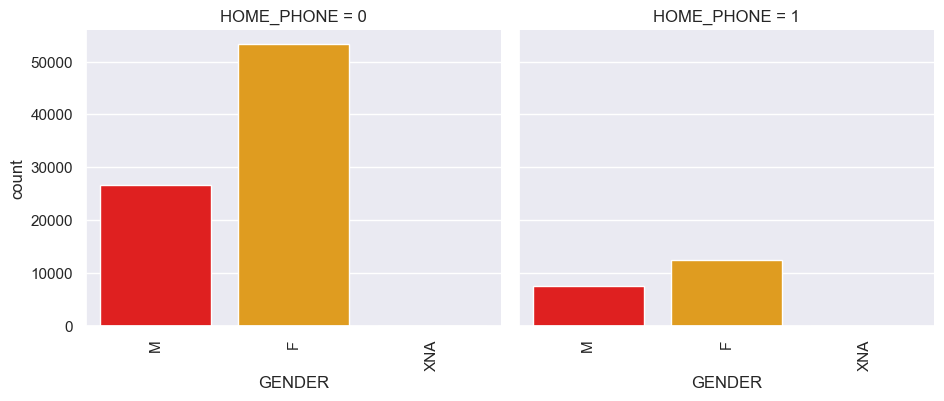

In [32]:
sns.set_theme(style="darkgrid")
plot=sns.catplot(data=df, x="GENDER", kind="count", col="HOME_PHONE", height=4, aspect=1.2,palette=["red","orange"])
for ax in plot.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

# Gender wise MOBILE_REACHABLE check  Available or not

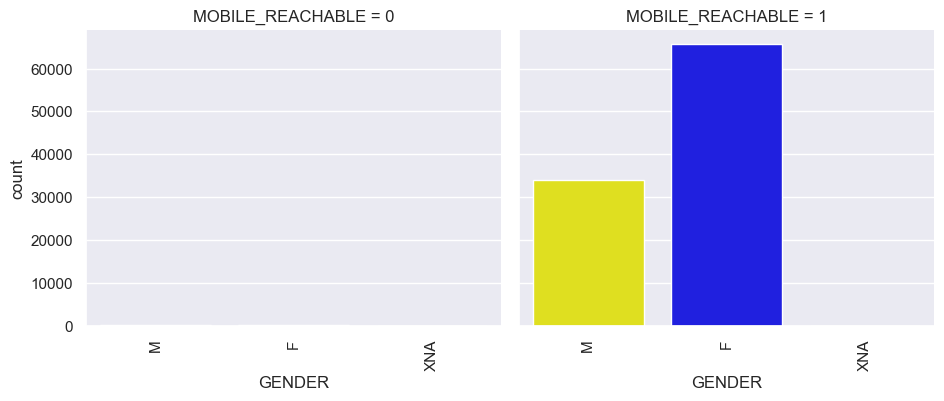

In [33]:
sns.set_theme(style="darkgrid")
plot=sns.catplot(data=df, x="GENDER", kind="count", col="MOBILE_REACHABLE", height=4, aspect=1.2,palette=["yellow","blue"])
for ax in plot.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

# Gender wise Email check  Available or not

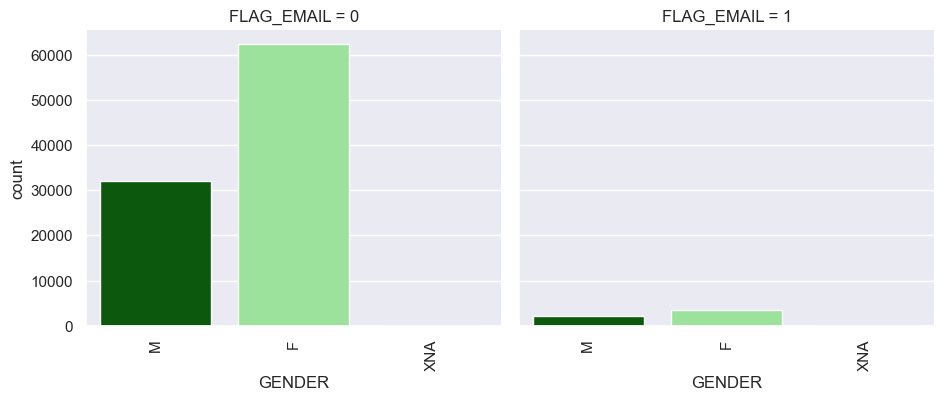

In [34]:
sns.set_theme(style="darkgrid")
plot=sns.catplot(data=df, x="GENDER", kind="count", col="FLAG_EMAIL", height=4, aspect=1.2,palette=["Darkgreen","lightgreen"])
for ax in plot.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

# Compare Target Wise each Mobile,Work,Home,Mobile Reachargble,email

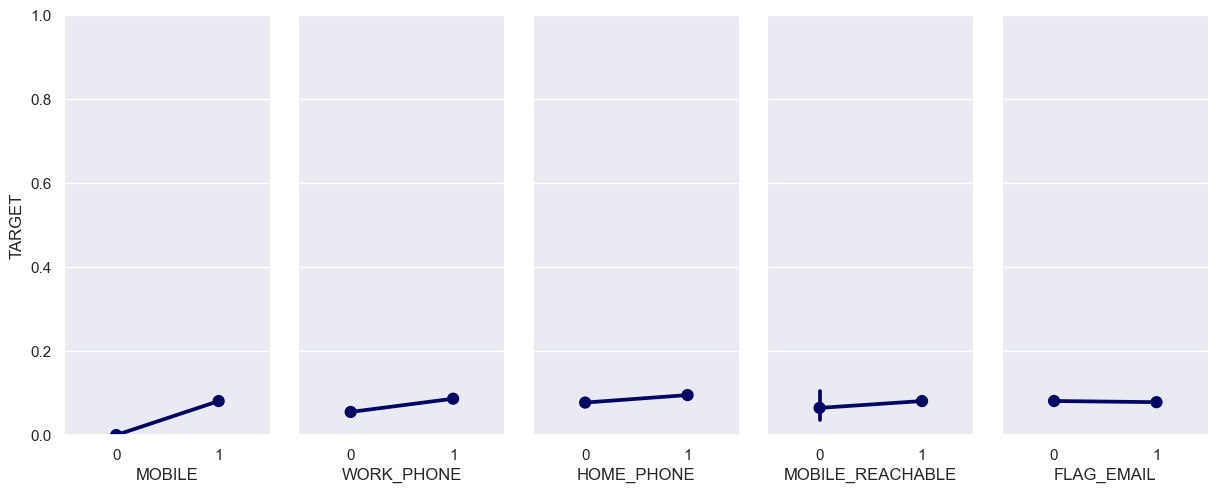

In [35]:
sns.set_theme(style="darkgrid")
g = sns.PairGrid(data=df, y_vars="TARGET",
                 x_vars=["MOBILE", "WORK_PHONE", "HOME_PHONE","MOBILE_REACHABLE","FLAG_EMAIL"],
                 height=5, aspect=.5)
g.map(sns.pointplot, color="xkcd:Darkblue")
g.set(ylim=(0, 1))
sns.despine(fig=g.fig, left=True)

# Describe People Type-Suite percentage

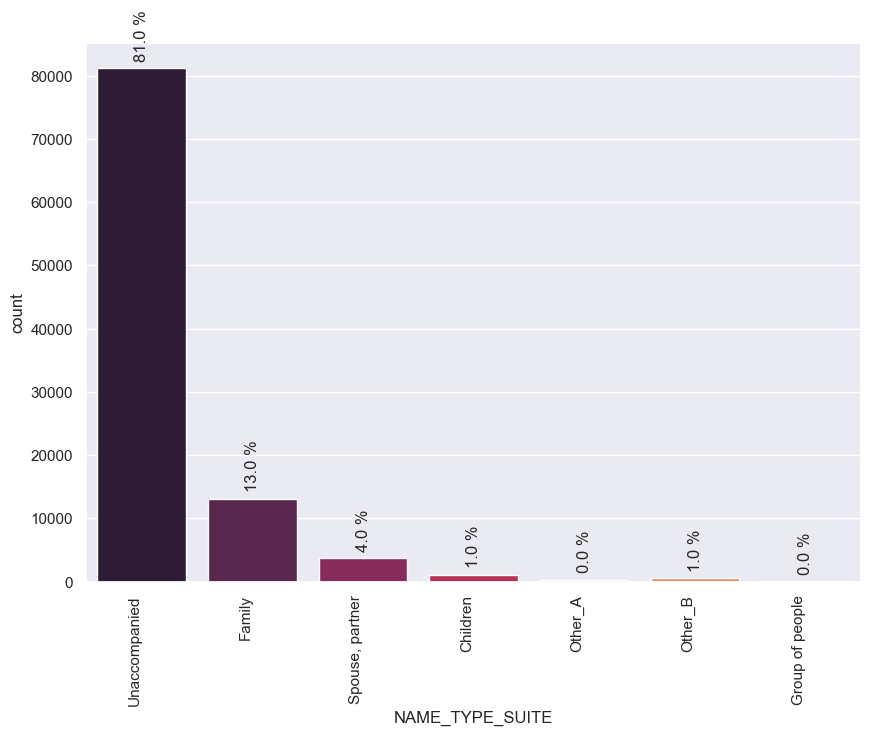

In [36]:

fig, ax = plt.subplots(figsize= (10, 7))
ax = sns.countplot(x = df["NAME_TYPE_SUITE"],palette="rocket")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, ha = "right") 
count = len(df["NAME_TYPE_SUITE"])                                     
for bar in ax.patches:                                                  
    percentage = f"{round(bar.get_height()/count, 2)*100} %"           
                                                                             
    x = bar.get_x() + bar.get_width() /2                                
    y = bar.get_height()                                                
    ax.annotate(percentage, (x, y), ha = "center", va = "bottom",xytext=(0,5),textcoords="offset points",rotation=90)          
                                                                         
plt.show()

# Gender wise check people Type Suite 

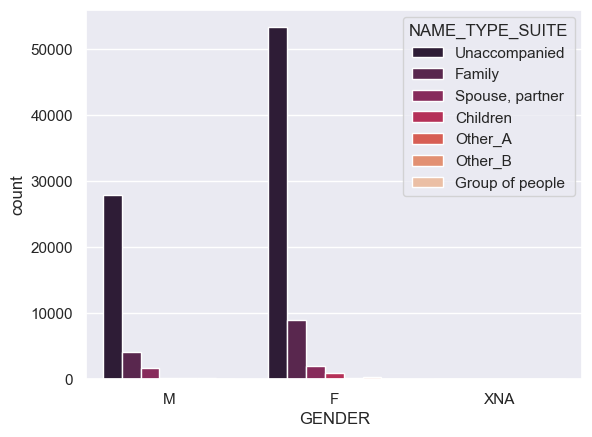

<Figure size 15000x15000 with 0 Axes>

In [37]:
sns.countplot(x = df['GENDER'], hue = df['NAME_TYPE_SUITE'],palette="rocket")
plt.figure(figsize=(150,150))
plt.show()

# Compare people Type suite based on Target

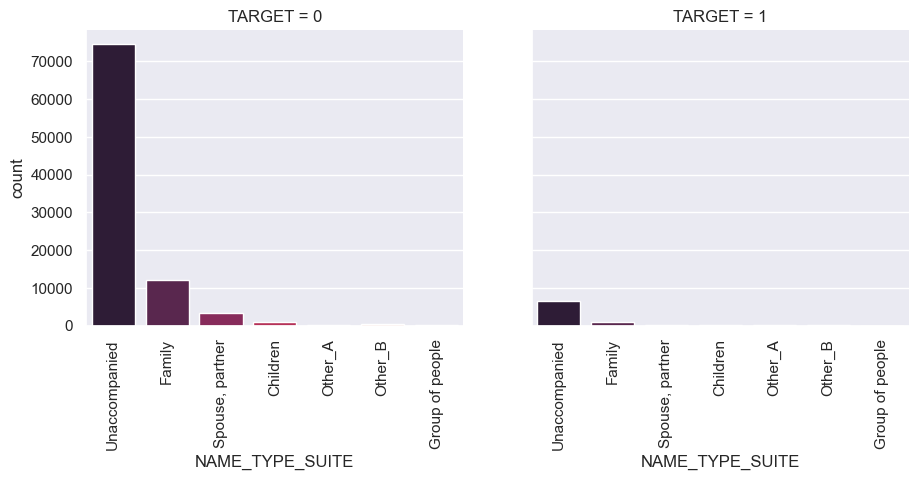

In [38]:
sns.set_theme(style="darkgrid")
plot=sns.catplot(data=df, x="NAME_TYPE_SUITE", kind="count", col="TARGET", height=4, aspect=1.2,palette="rocket")
for ax in plot.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

# Describe Income Type of people percentage

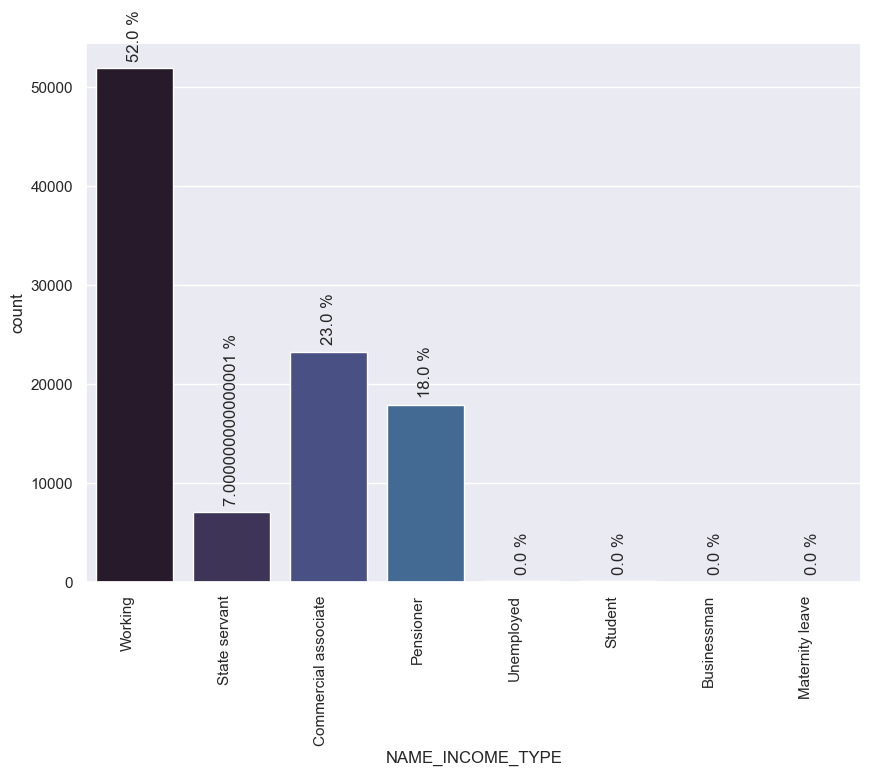

In [39]:

fig, ax = plt.subplots(figsize= (10, 7))
ax = sns.countplot(x = df["NAME_INCOME_TYPE"],palette="mako")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, ha = "right") 
count = len(df["NAME_INCOME_TYPE"])                                     
for bar in ax.patches:                                                  
    percentage = f"{round(bar.get_height()/count, 2)*100} %"           
                                                                             
    x = bar.get_x() + bar.get_width() /2                                
    y = bar.get_height()                                                
    ax.annotate(percentage, (x, y), ha = "center", va = "bottom",xytext=(0,5),textcoords="offset points",rotation=90)          
                                                                         
plt.show()

# Gender wise check people Income Type 

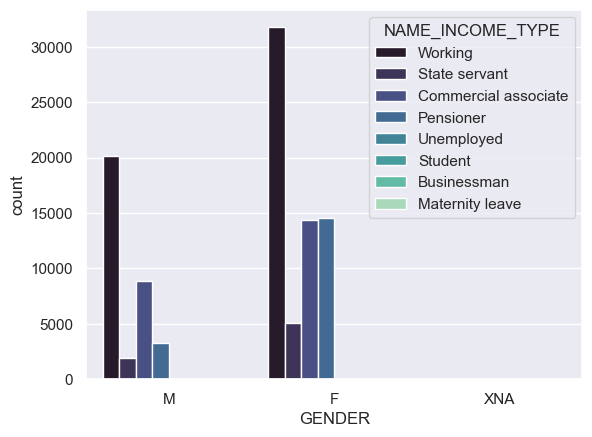

<Figure size 15000x15000 with 0 Axes>

In [40]:
sns.countplot(x = df['GENDER'], hue = df['NAME_INCOME_TYPE'],palette="mako")
plt.figure(figsize=(150,150))
plt.show()

# Compare people Income Type based on Target

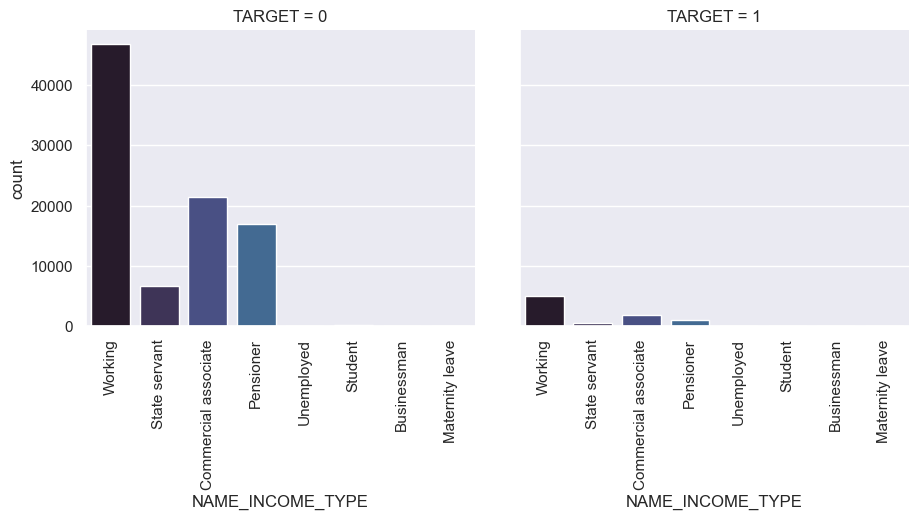

In [41]:
sns.set_theme(style="darkgrid")
plot=sns.catplot(data=df, x="NAME_INCOME_TYPE", kind="count", col="TARGET", height=4, aspect=1.2,palette="mako")
for ax in plot.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

# Education Type of eash catagory percentage

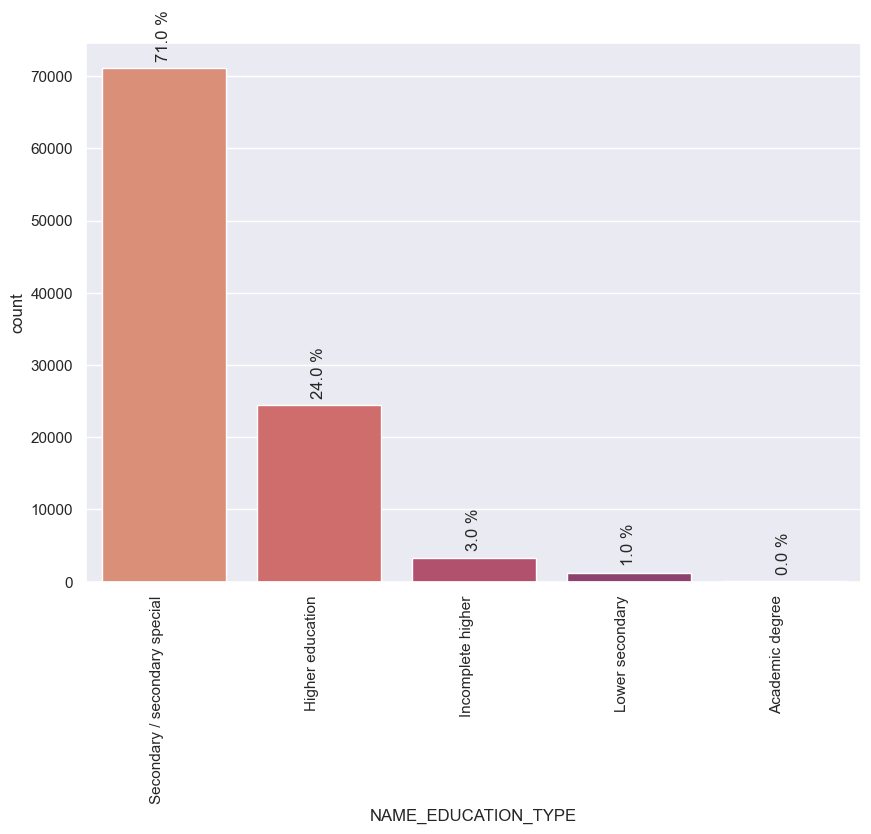

In [42]:

fig, ax = plt.subplots(figsize= (10, 7))
ax = sns.countplot(x = df["NAME_EDUCATION_TYPE"],palette="flare")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, ha = "right") 
count = len(df["NAME_EDUCATION_TYPE"])                                     
for bar in ax.patches:                                                  
    percentage = f"{round(bar.get_height()/count, 2)*100} %"           
                                                                             
    x = bar.get_x() + bar.get_width() /2                                
    y = bar.get_height()                                                
    ax.annotate(percentage, (x, y), ha = "center", va = "bottom",xytext=(0,5),textcoords="offset points",rotation=90)          
                                                                         
plt.show()

# Compare people Education Type based on Gender

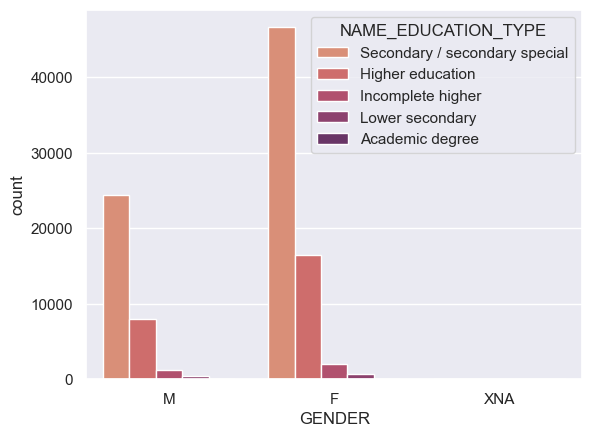

<Figure size 15000x15000 with 0 Axes>

In [43]:
sns.countplot(x = df['GENDER'], hue = df['NAME_EDUCATION_TYPE'],palette="flare")
plt.figure(figsize=(150,150))
plt.show()

# Compare people Education Type based on Target

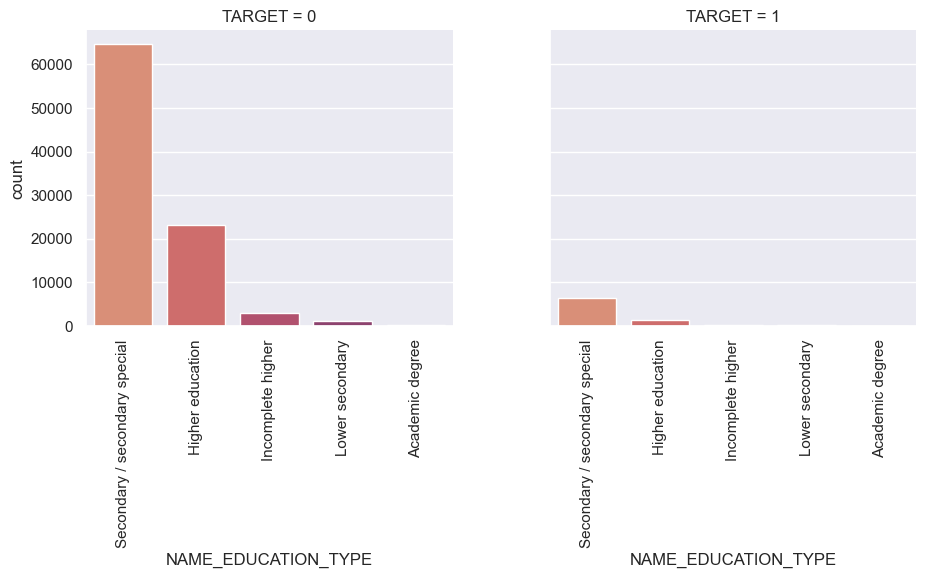

In [44]:
sns.set_theme(style="darkgrid")
plot=sns.catplot(data=df, x="NAME_EDUCATION_TYPE", kind="count", col="TARGET", height=4, aspect=1.2,palette="flare")
for ax in plot.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

# Income Type  wise Total no of Education type

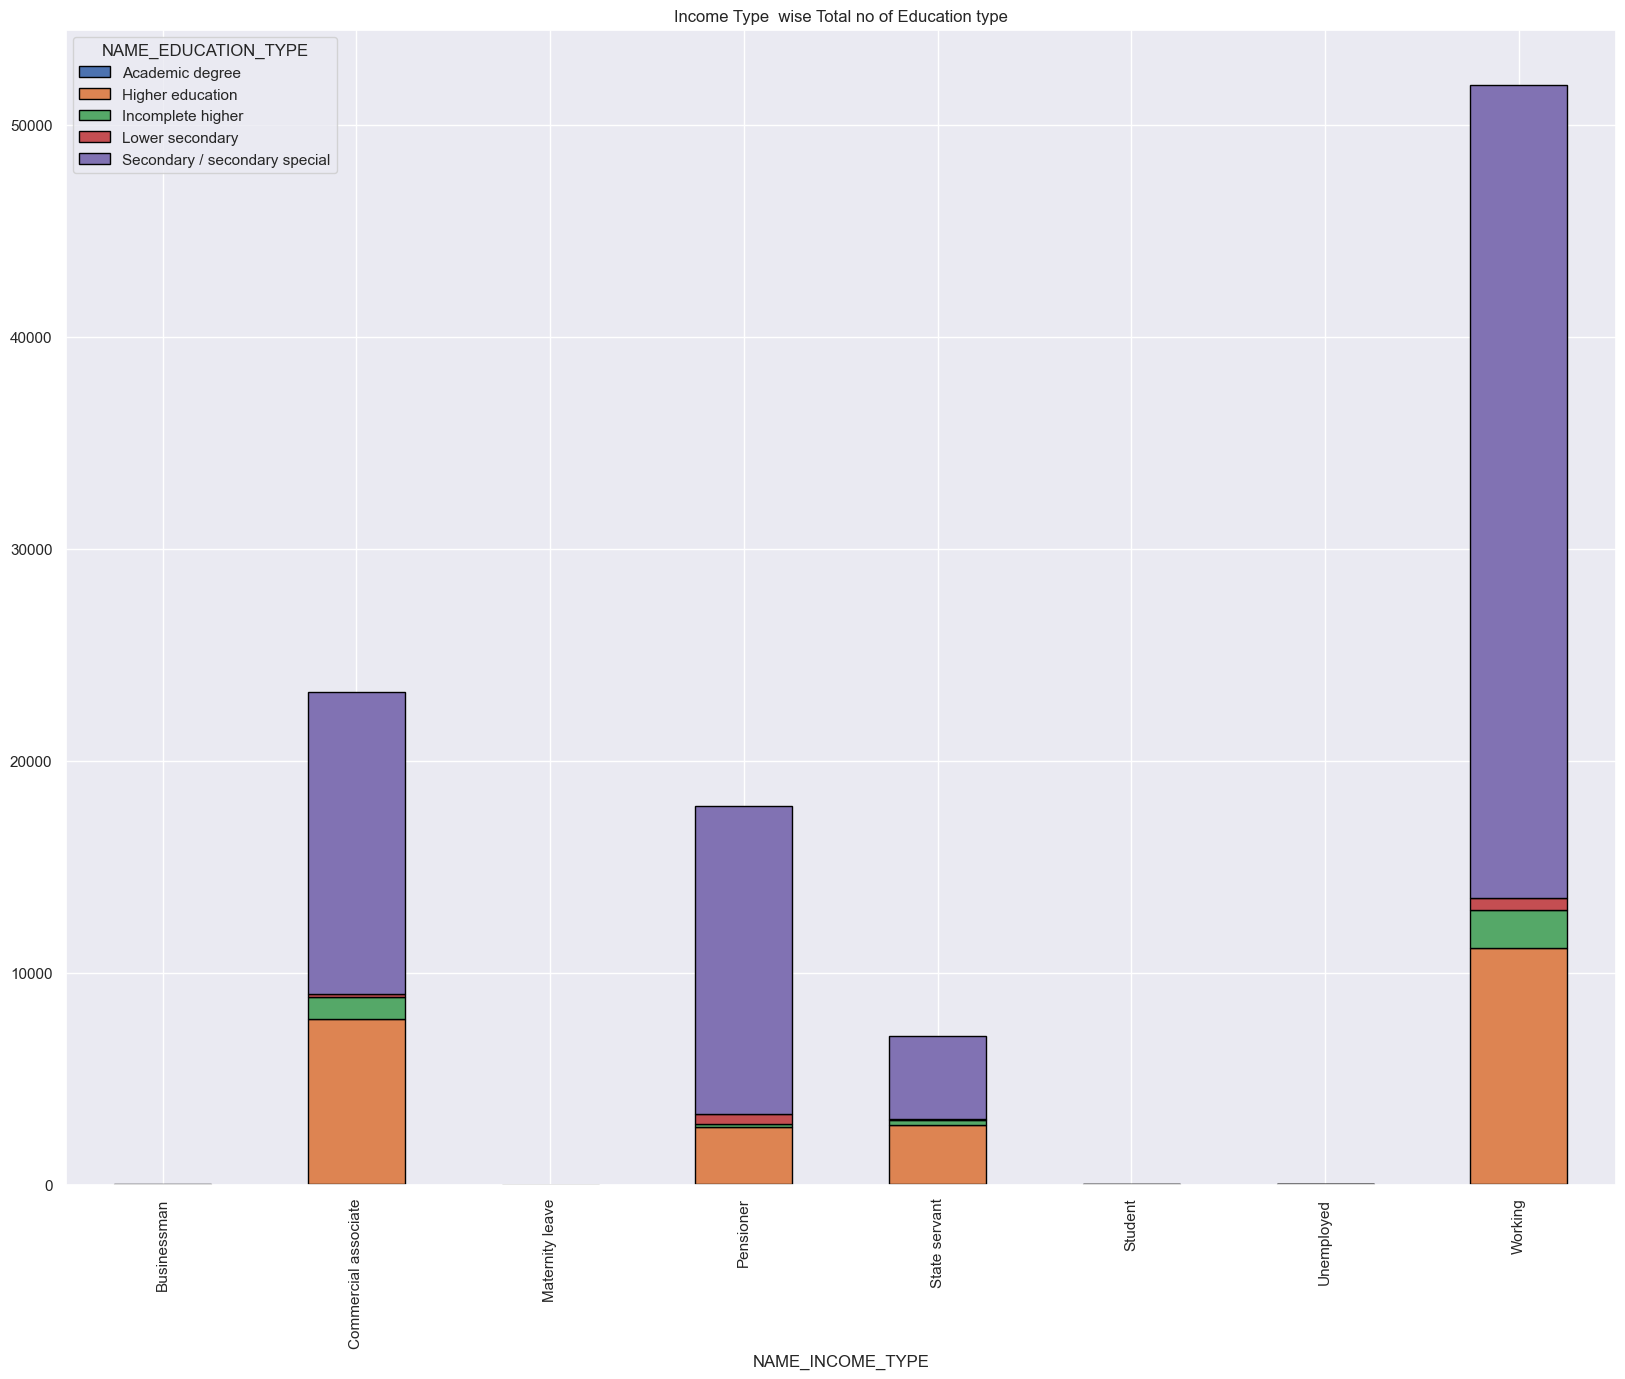

In [45]:
count=pd.crosstab(df.NAME_INCOME_TYPE,df.NAME_EDUCATION_TYPE)
count.plot(kind="bar",stacked=True,title="Income Type  wise Total no of Education type",figsize=(20,15),edgecolor="black")
plt.show()

# Family Status  of eash catagory percentage

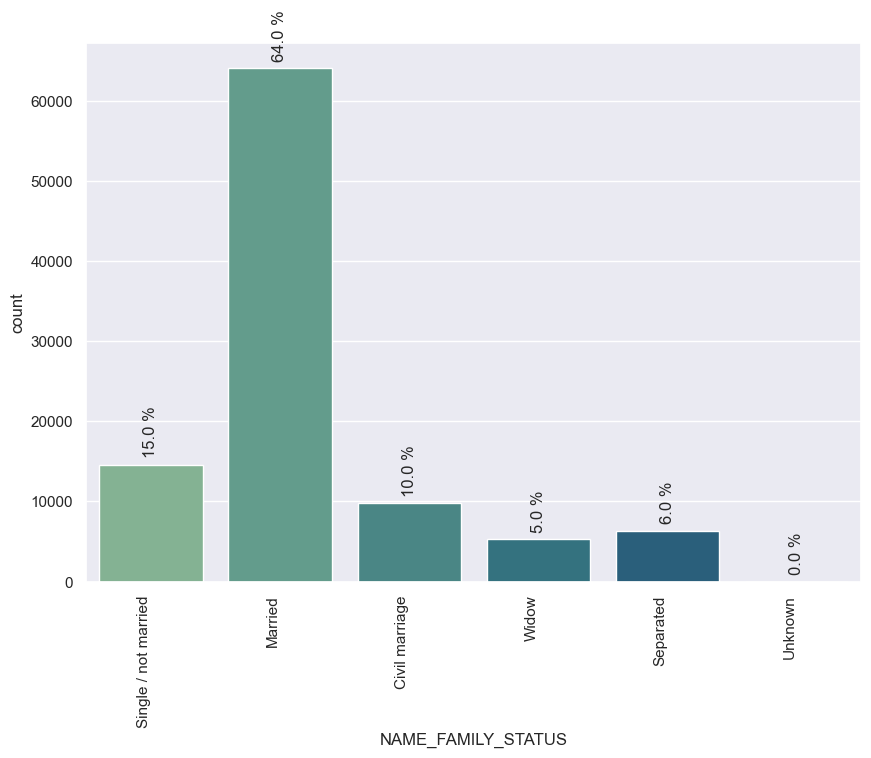

In [46]:

fig, ax = plt.subplots(figsize= (10, 7))
ax = sns.countplot(x = df["NAME_FAMILY_STATUS"],palette="crest")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, ha = "right") 
count = len(df["NAME_FAMILY_STATUS"])                                     
for bar in ax.patches:                                                  
    percentage = f"{round(bar.get_height()/count, 2)*100} %"           
                                                                             
    x = bar.get_x() + bar.get_width() /2                                
    y = bar.get_height()                                                
    ax.annotate(percentage, (x, y), ha = "center", va = "bottom",xytext=(0,5),textcoords="offset points",rotation=90)          
                                                                         
plt.show()

# Compare people Family Status based on Gender

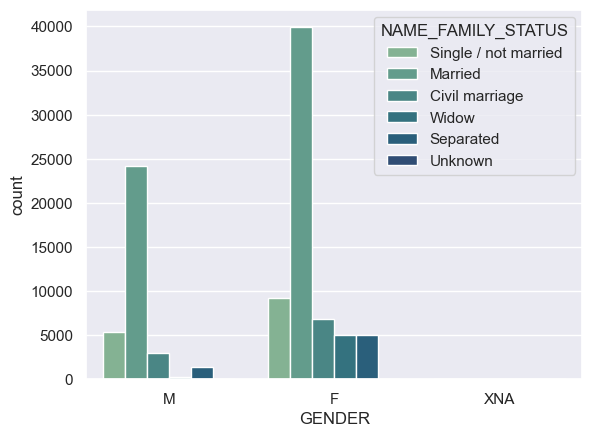

<Figure size 15000x15000 with 0 Axes>

In [47]:
sns.countplot(x = df['GENDER'], hue = df['NAME_FAMILY_STATUS'],palette="crest")
plt.figure(figsize=(150,150))
plt.show()

# Compare people Education Type based on Target

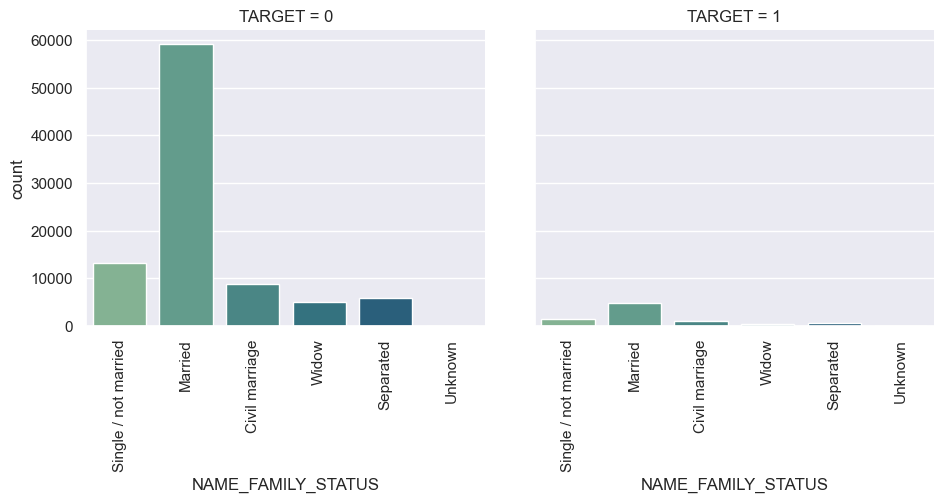

In [48]:
sns.set_theme(style="darkgrid")
plot=sns.catplot(data=df, x="NAME_FAMILY_STATUS", kind="count", col="TARGET", height=4, aspect=1.2,palette="crest")
for ax in plot.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

# Income Type  wise Total no of Family Status

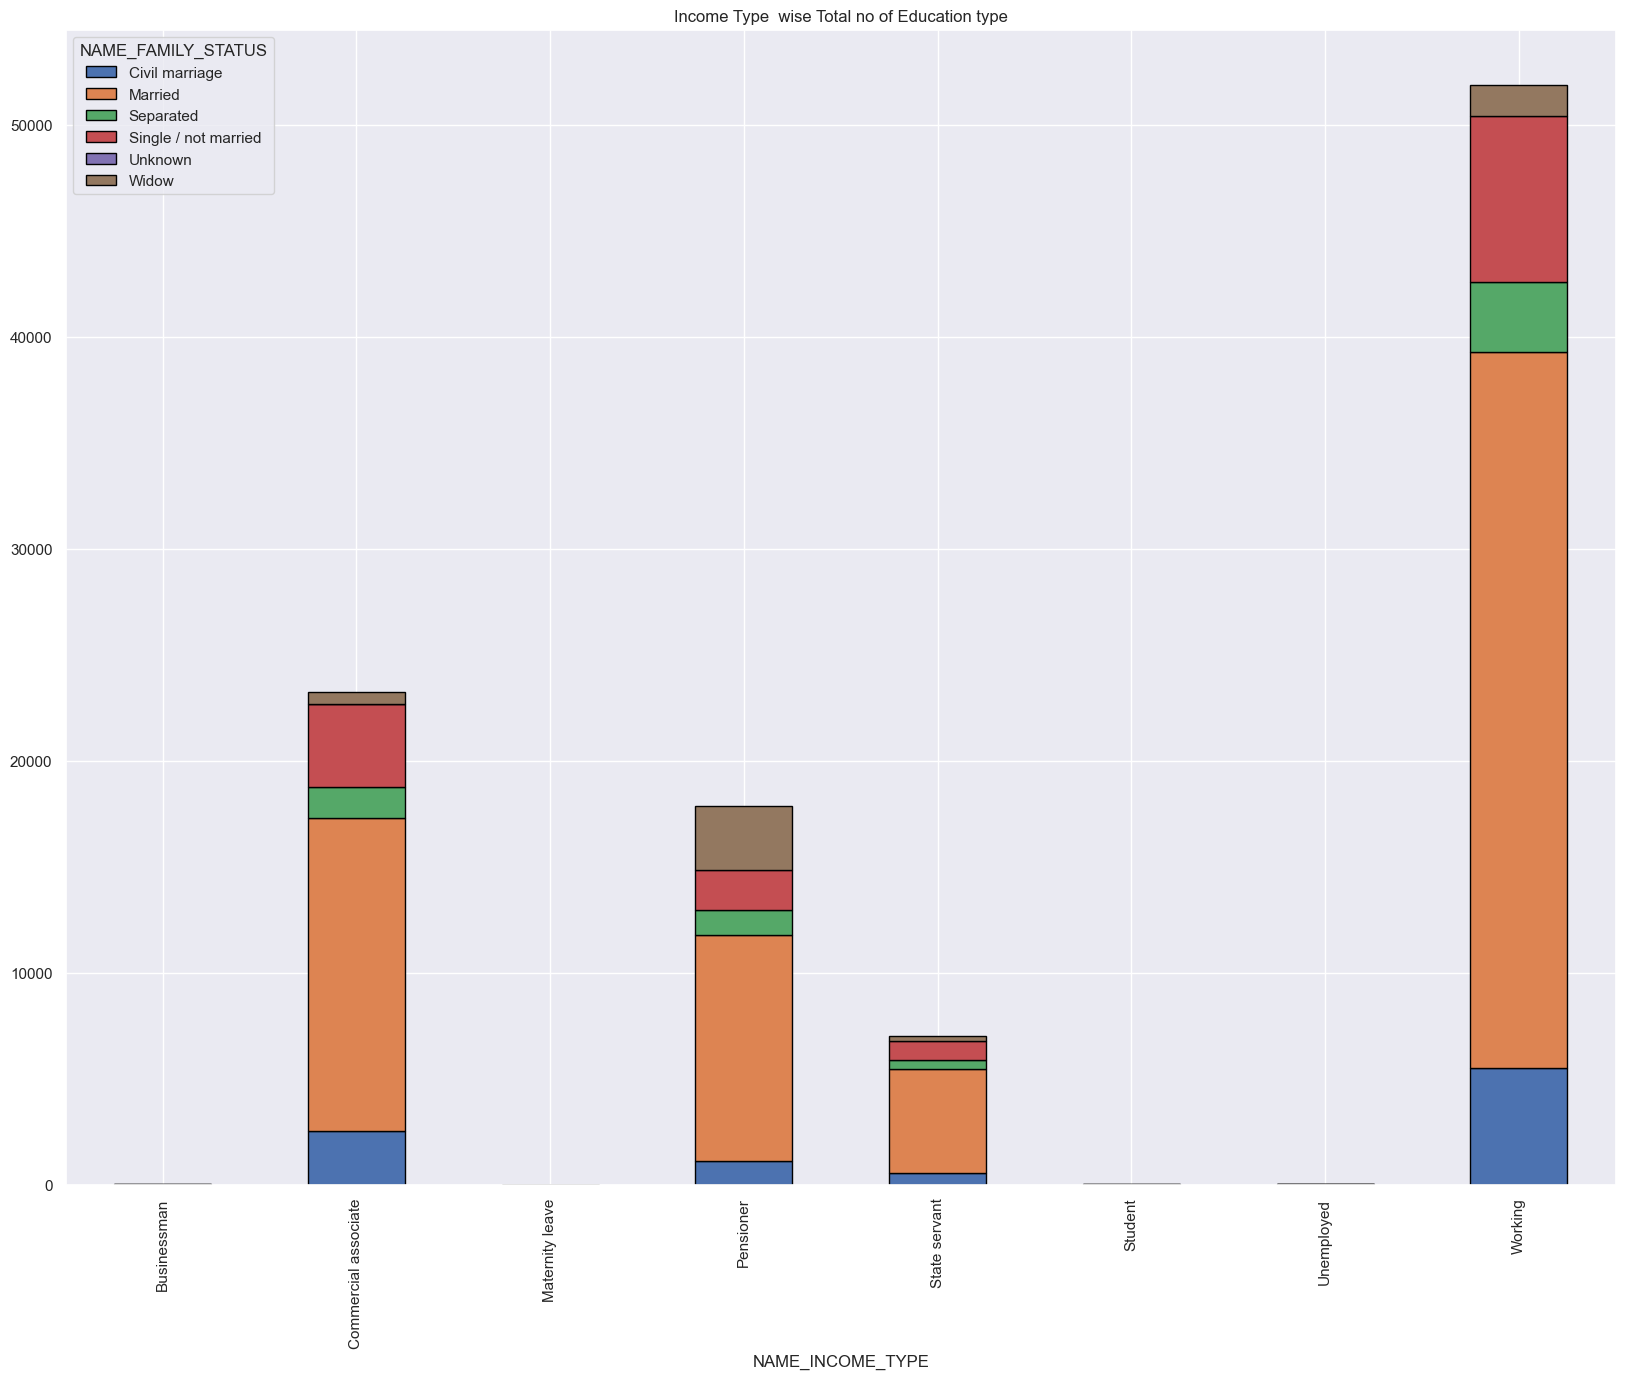

In [49]:
count=pd.crosstab(df.NAME_INCOME_TYPE,df.NAME_FAMILY_STATUS)
count.plot(kind="bar",stacked=True,title="Income Type  wise Total no of Education type",figsize=(20,15),edgecolor="black")
plt.show()

# Occupation type  of eash catagory percentage

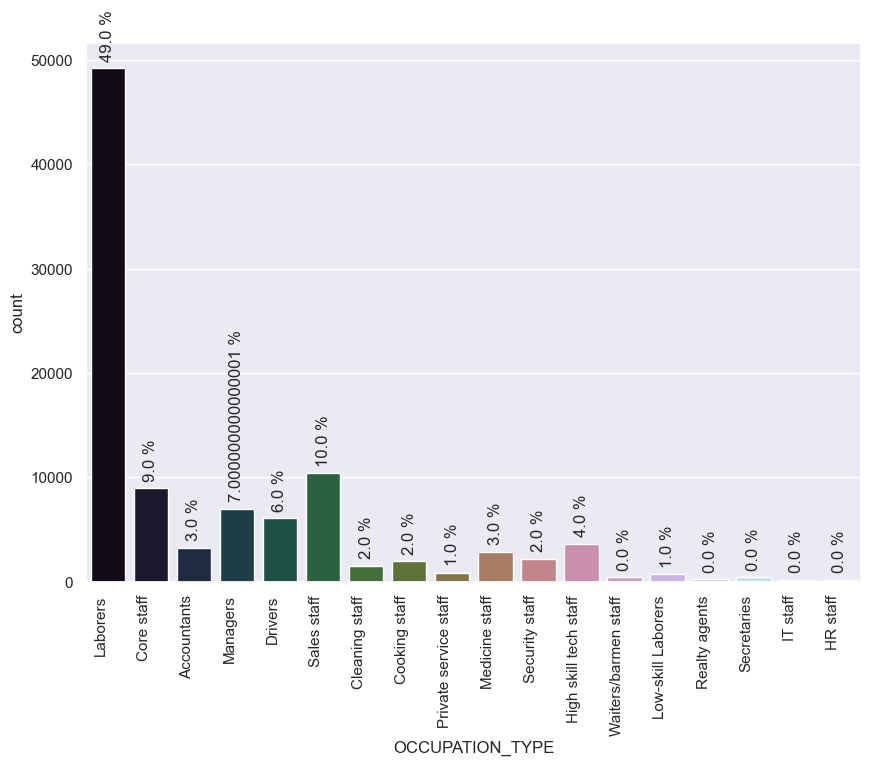

In [50]:

fig, ax = plt.subplots(figsize= (10, 7))
ax = sns.countplot(x = df["OCCUPATION_TYPE"],palette="cubehelix")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, ha = "right") 
count = len(df["OCCUPATION_TYPE"])                                     
for bar in ax.patches:                                                  
    percentage = f"{round(bar.get_height()/count, 2)*100} %"           
                                                                             
    x = bar.get_x() + bar.get_width() /2                                
    y = bar.get_height()                                                
    ax.annotate(percentage, (x, y), ha = "center", va = "bottom",xytext=(0,5),textcoords="offset points",rotation=90)          
                                                                         
plt.show()

# Compare people Occupation Type based on Gender

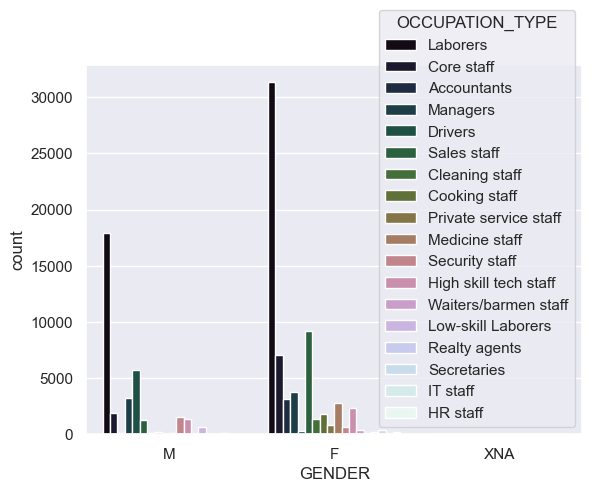

<Figure size 2500x1500 with 0 Axes>

In [51]:
sns.countplot(x = df['GENDER'], hue = df['OCCUPATION_TYPE'],palette="cubehelix")
plt.figure(figsize=(25,15))
plt.show()

# Compare people Occupation Type based on Target

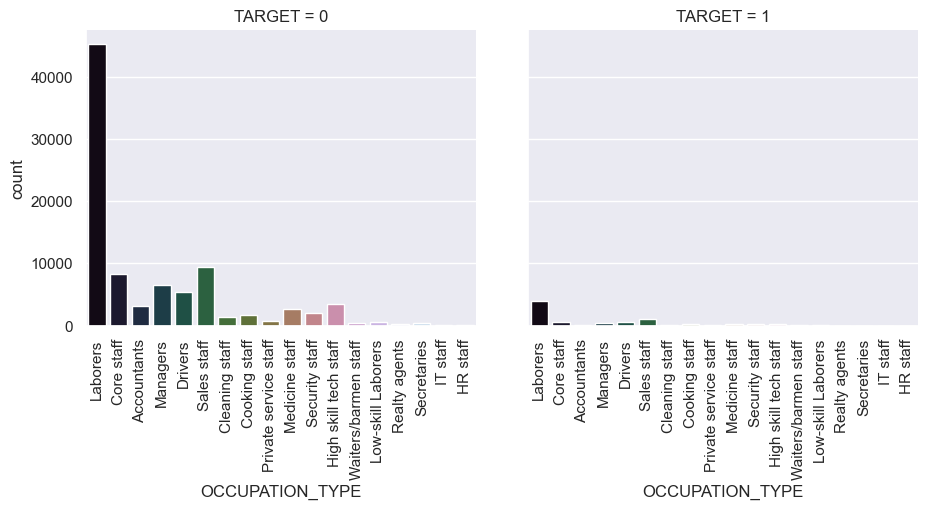

In [52]:
sns.set_theme(style="darkgrid")
plot=sns.catplot(data=df, x="OCCUPATION_TYPE", kind="count", col="TARGET", height=4, aspect=1.2,palette="cubehelix")
for ax in plot.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

# Income Type  wise Total no of Occupation type

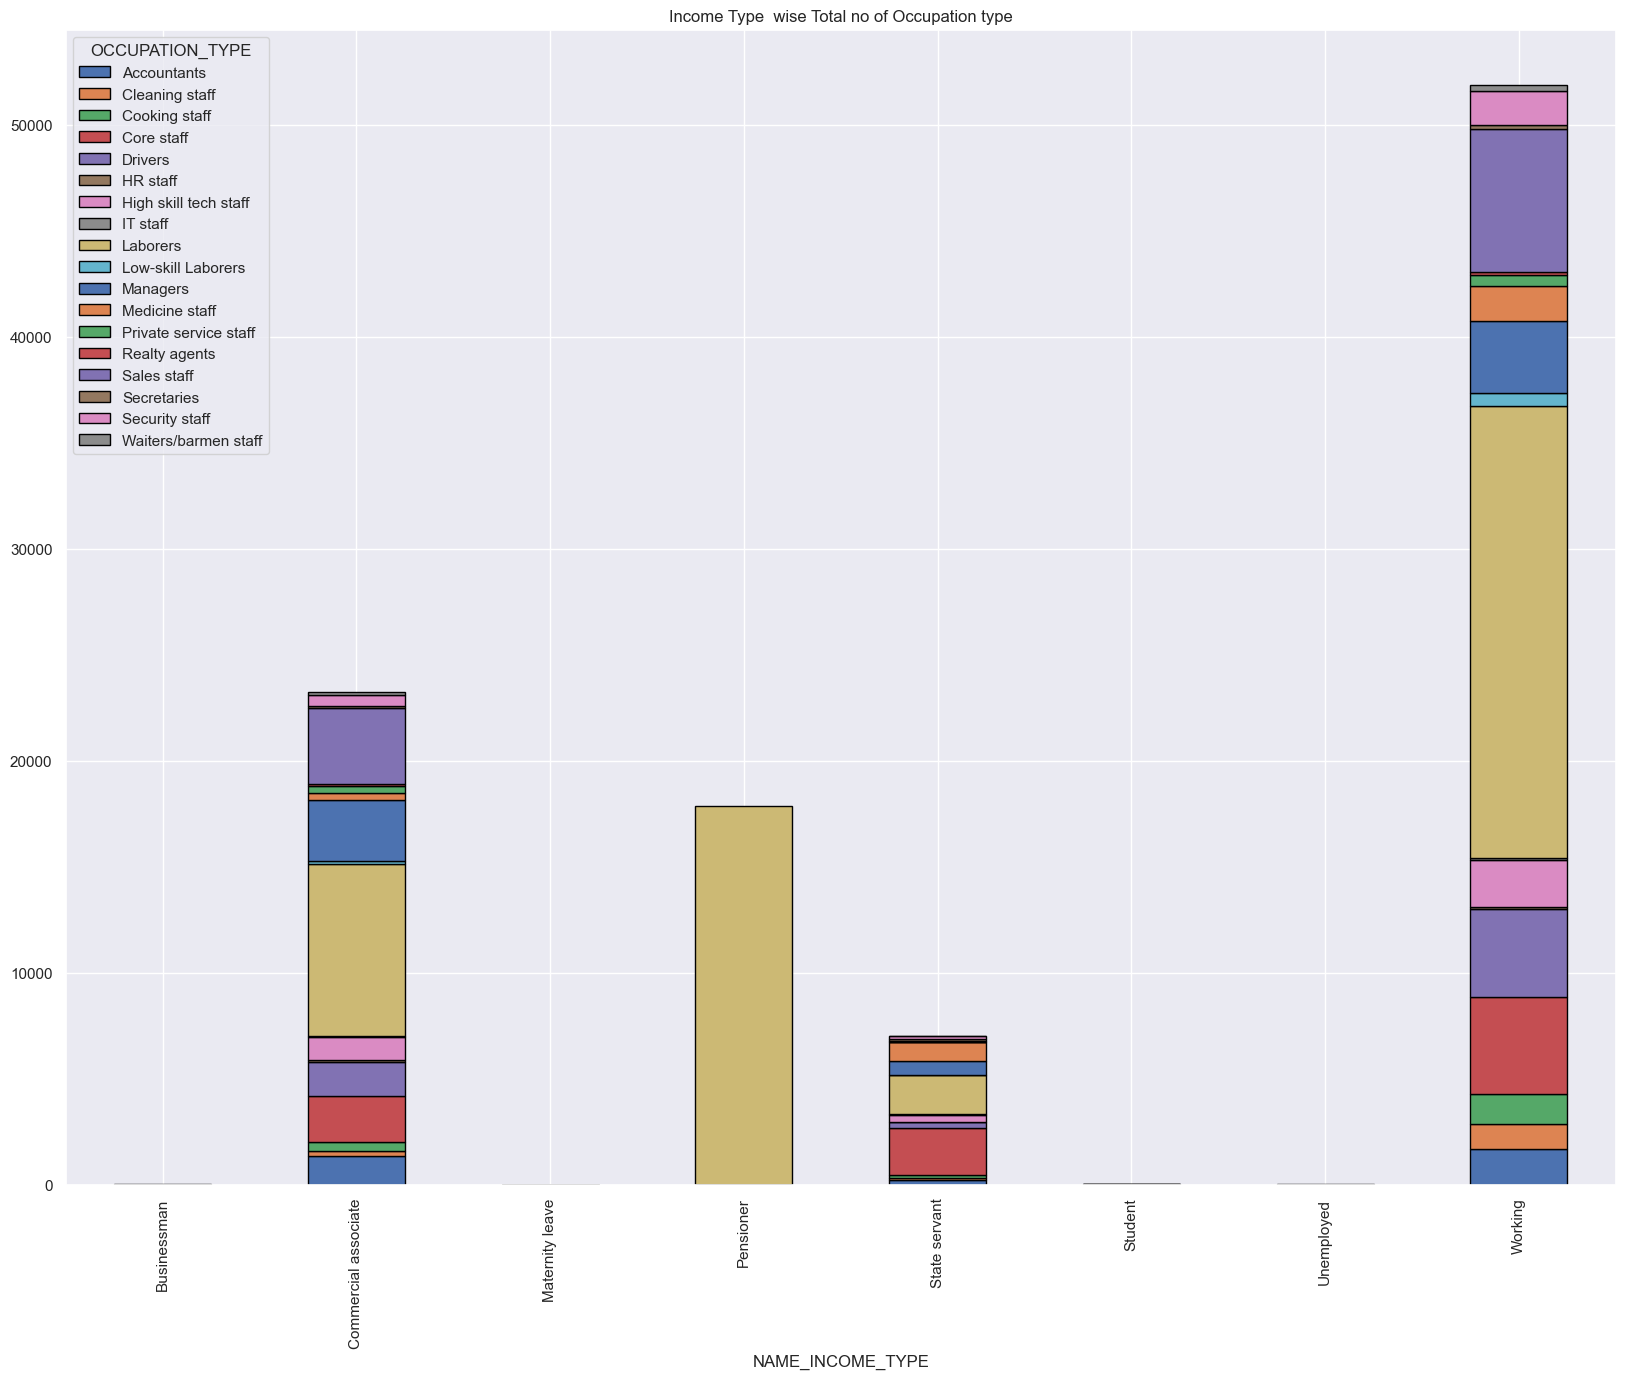

In [53]:
count=pd.crosstab(df.NAME_INCOME_TYPE,df.OCCUPATION_TYPE)
count.plot(kind="bar",stacked=True,title="Income Type  wise Total no of Occupation type",figsize=(20,15),edgecolor="black")
plt.show()

In [54]:
df.CNT_CHILDREN.unique()

array([ 0,  1,  2,  3,  4,  7,  5,  6,  8,  9, 11, 12], dtype=int64)

In [55]:
df.CNT_FAM_MEMBERS.unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  9.,  7.,  8., 10., 13., 14.])

# Current Childern-Wise ratio of Income Type

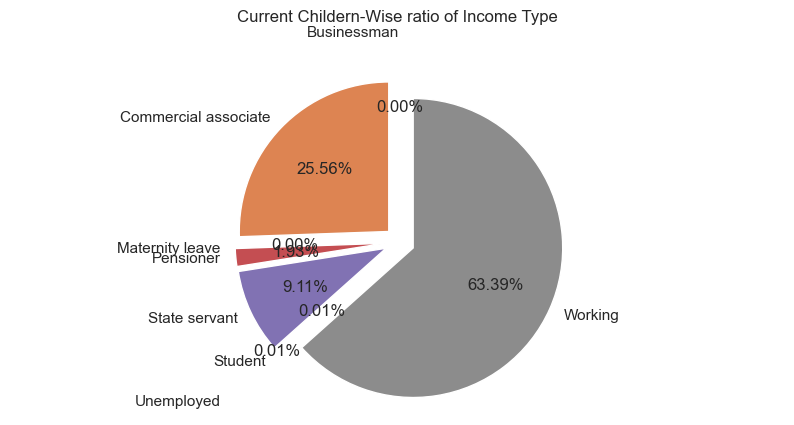

In [56]:
Child_cost=df.groupby("NAME_INCOME_TYPE")["CNT_CHILDREN"].sum()
Total_Cost=Child_cost.sum()
Child_ratio=Child_cost/Total_Cost*100
plt.figure(figsize=(10,5))
myexplode = [0.3, 0.1, 0.1, 0.1,0.1,0.1,0.5,0.1]
plt.pie(Child_ratio,labels=Child_ratio.index,explode=myexplode,autopct="%0.2f%%",startangle=90)
plt.title("Current Childern-Wise ratio of Income Type")
plt.axis("equal")
plt.show()

# Family Members-Wise ratio of Income Type

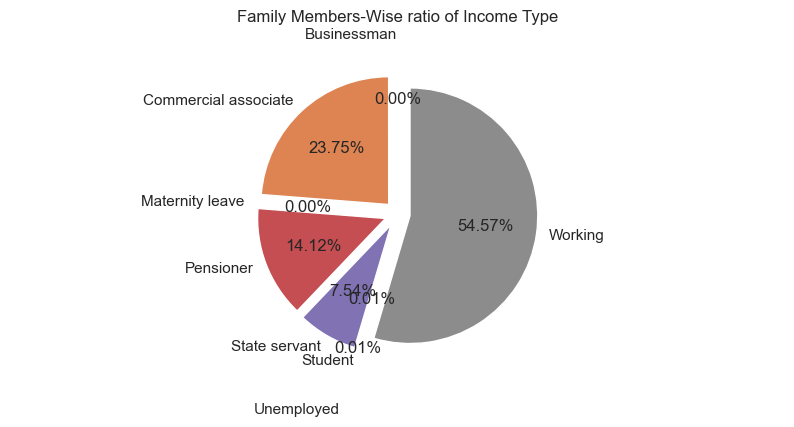

In [57]:
Child_cost=df.groupby("NAME_INCOME_TYPE")["CNT_FAM_MEMBERS"].sum()
Total_Cost=Child_cost.sum()
Child_ratio=Child_cost/Total_Cost*100
plt.figure(figsize=(10,5))
myexplode = [0.3, 0.1, 0.1, 0.1,0.1,0.1,0.5,0.1]
plt.pie(Child_ratio,labels=Child_ratio.index,explode=myexplode,autopct="%0.2f%%",startangle=90)
plt.title("Family Members-Wise ratio of Income Type")
plt.axis("equal")
plt.show()

In [58]:
df.TOTAL_DOC_SUBMITTED.unique()

array([1, 0, 2, 3, 4], dtype=int64)

# Compare people income Type based on Document Submitted

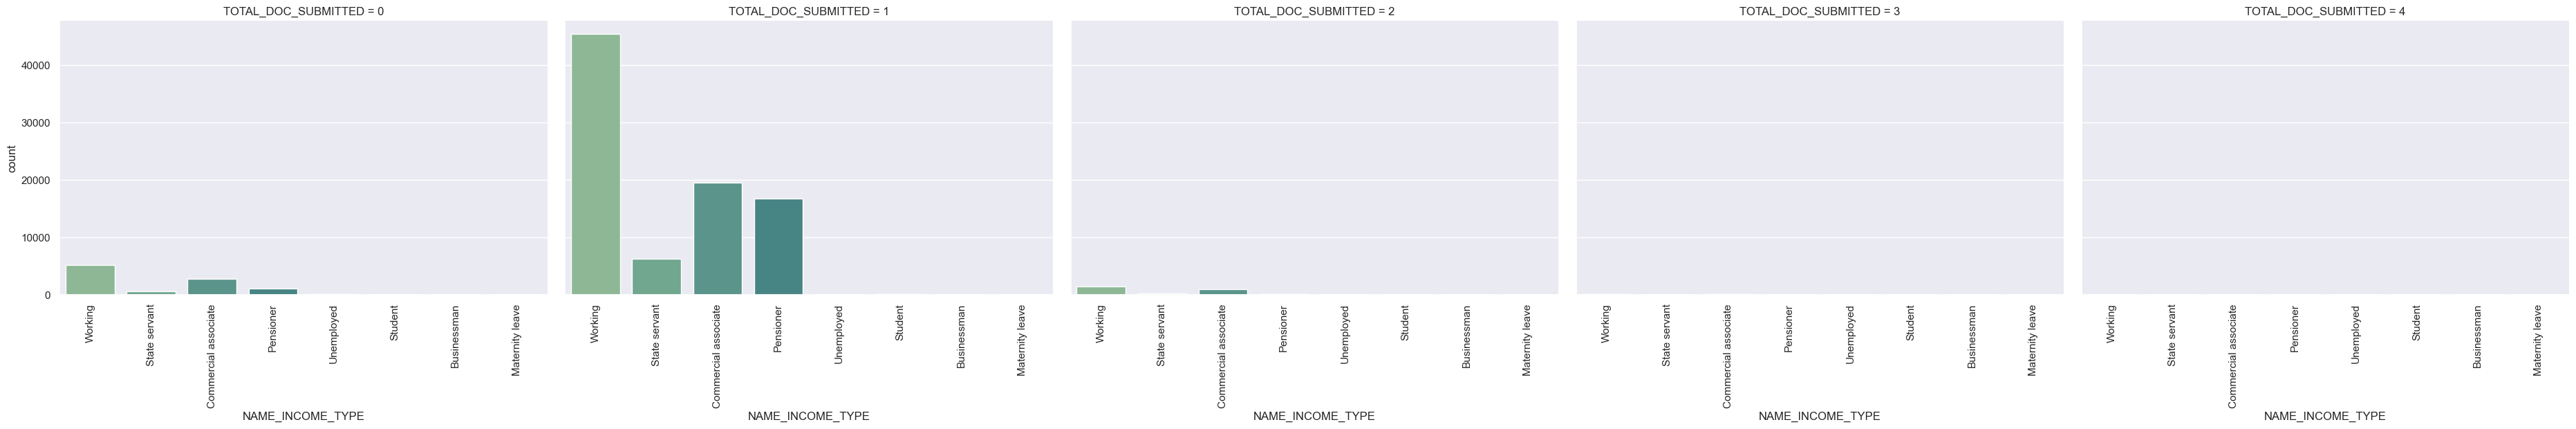

In [59]:
sns.set_theme(style="darkgrid")
plot=sns.catplot(data=df, x="NAME_INCOME_TYPE", kind="count", col="TOTAL_DOC_SUBMITTED", height=5, aspect=1.5,palette="crest")
for ax in plot.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

# Compare people GenderType based on Documnent Submitted

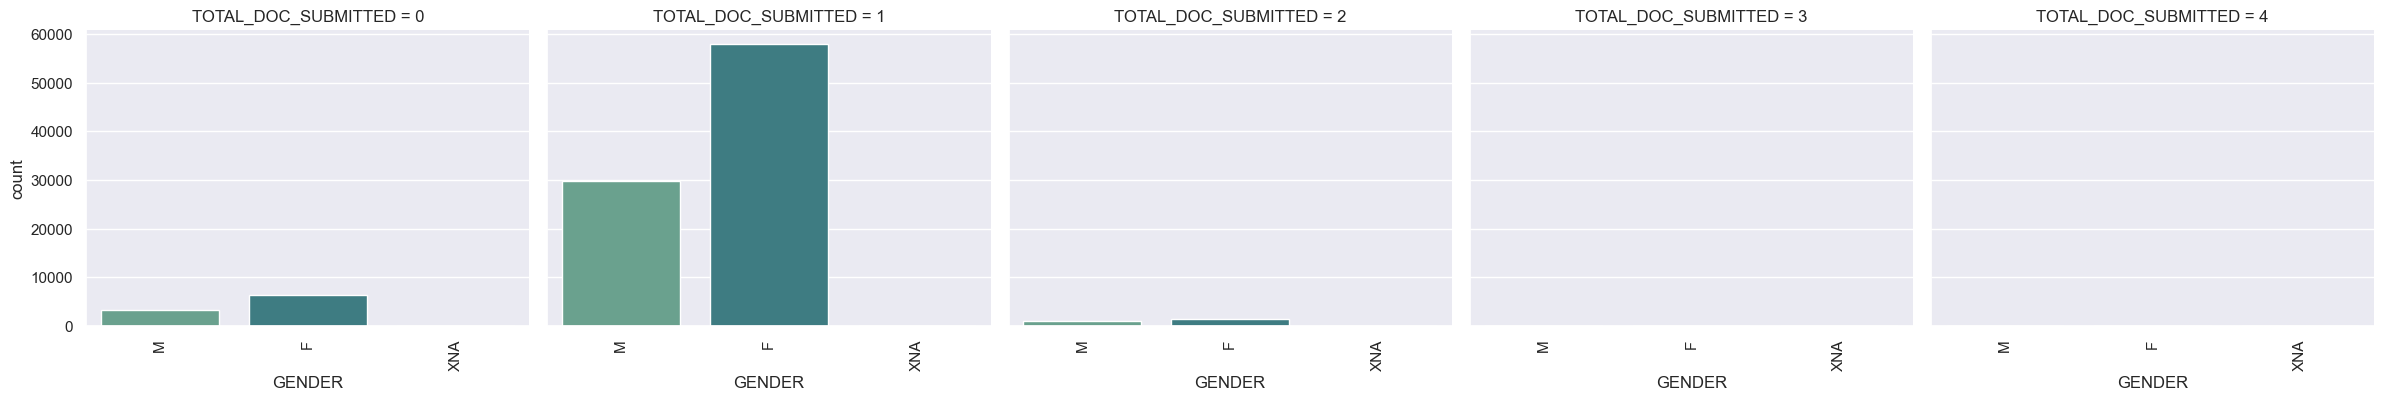

In [60]:
sns.set_theme(style="darkgrid")
plot=sns.catplot(data=df, x="GENDER", kind="count", col="TOTAL_DOC_SUBMITTED", height=4, aspect=1.2,palette="crest")
for ax in plot.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

# Contract Type check the target along with the Gender,Document Submitted

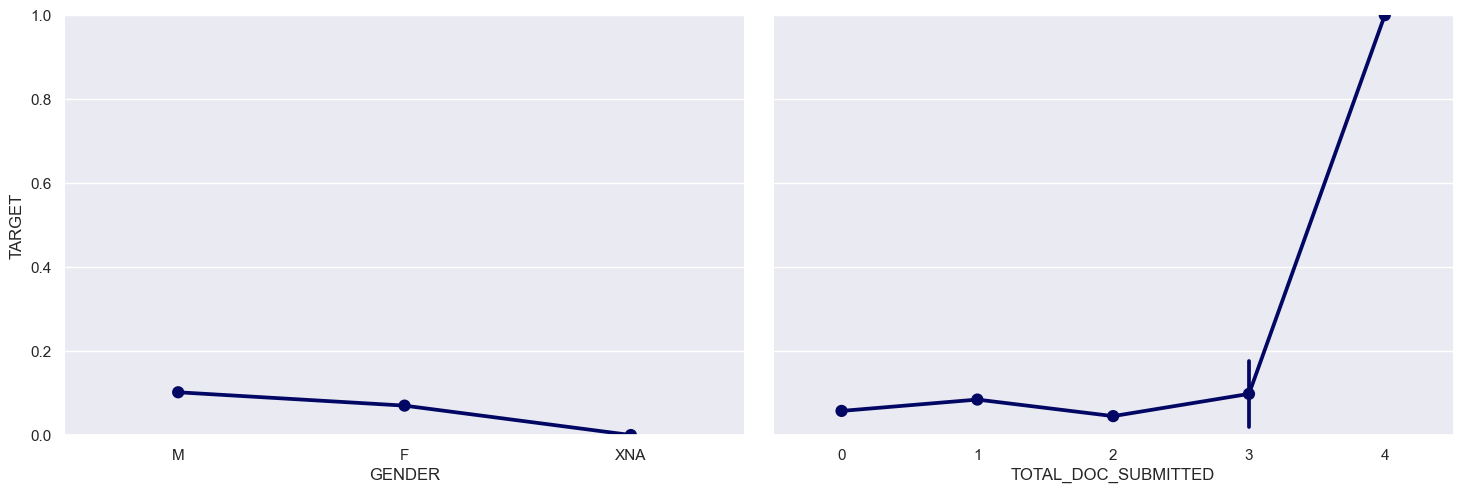

In [61]:
sns.set_theme(style="darkgrid")
g = sns.PairGrid(data=df, y_vars="TARGET",
                 x_vars=["GENDER", "TOTAL_DOC_SUBMITTED"],
                 height=5, aspect=1.5)
g.map(sns.pointplot, color="xkcd:Darkblue")
g.set(ylim=(0, 1))
sns.despine(fig=g.fig, left=True)

# Amount credit for each Gender

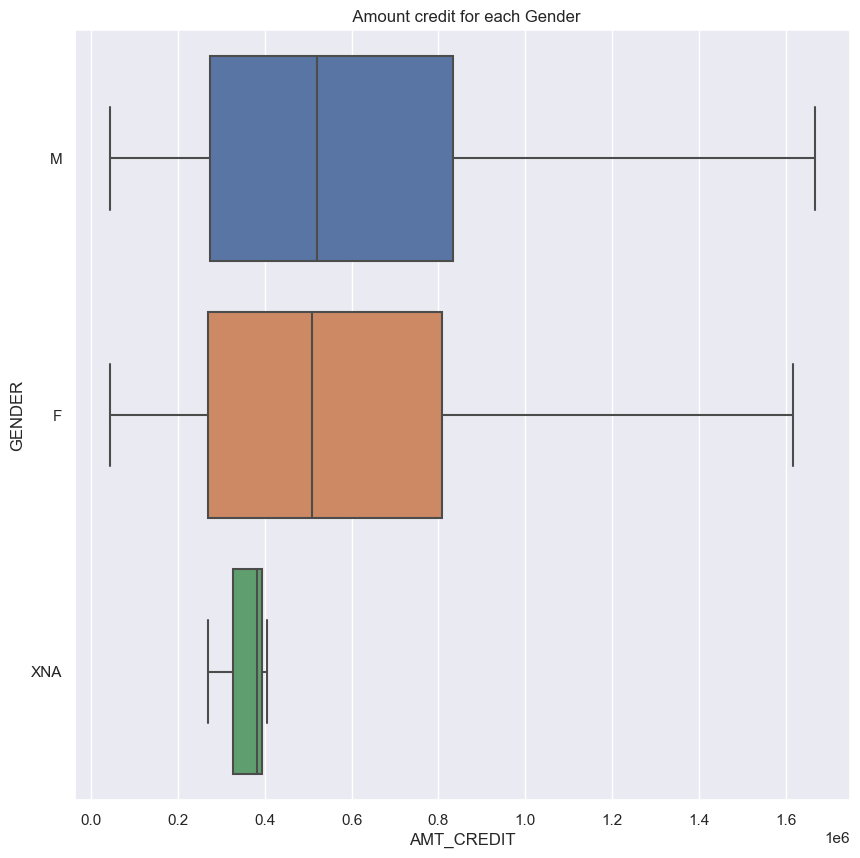

In [62]:
plt.figure(figsize = (10,10))
sns.boxplot(x = df['AMT_CREDIT'], y = df['GENDER'],showfliers = False)
plt.title("  Amount credit for each Gender")
plt.show()


# Amount Good price for each Gender

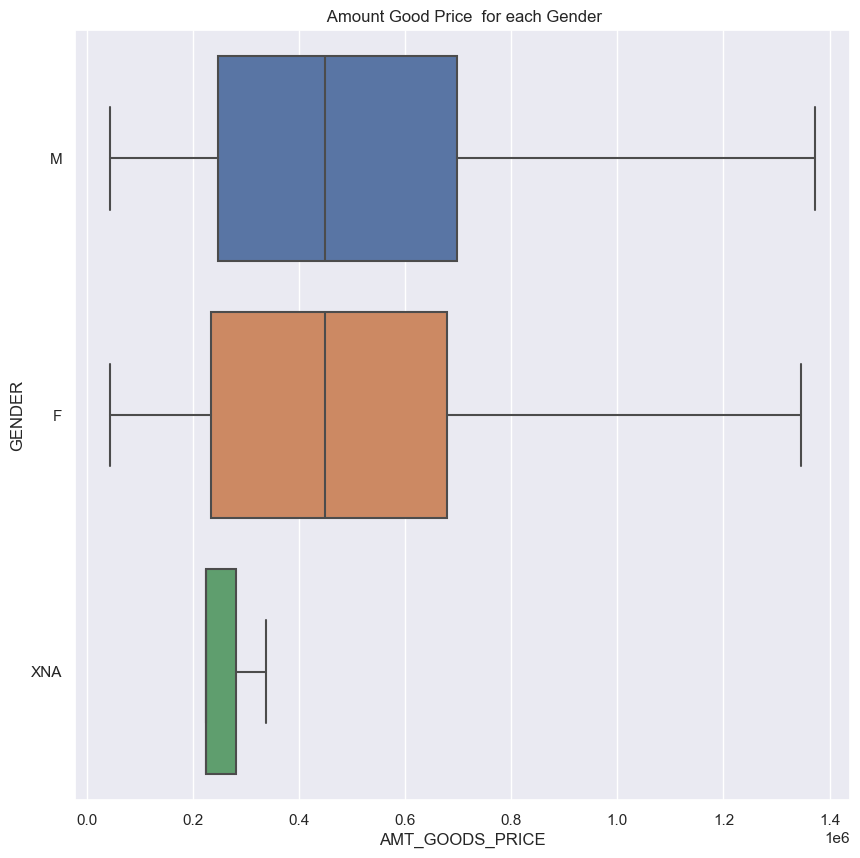

In [63]:
plt.figure(figsize = (10,10))
sns.boxplot(x = df['AMT_GOODS_PRICE'], y = df['GENDER'],showfliers = False)
plt.title(" Amount Good Price  for each Gender")
plt.show()


In [64]:
# Amount Total Amount Income for each Gender

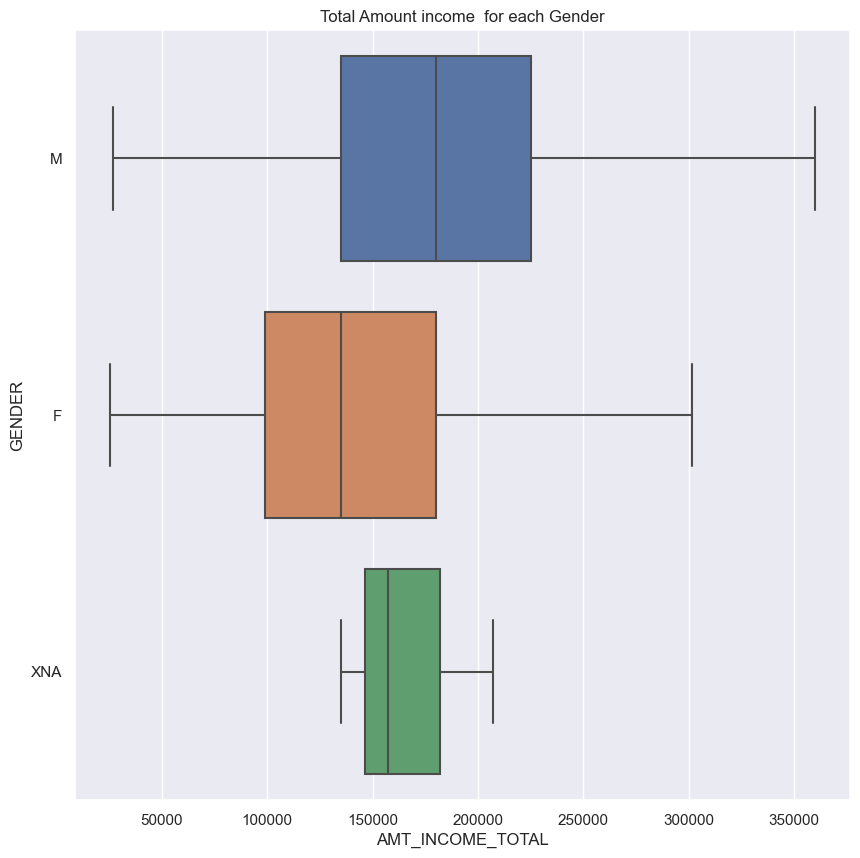

In [65]:
plt.figure(figsize = (10,10))
sns.boxplot(x = df['AMT_INCOME_TOTAL'], y = df['GENDER'],showfliers = False)
plt.title("Total Amount income  for each Gender")
plt.show()
